# Approximate NMDA dynamics

In this notebook, we will describe the approximation we employ, and compare the dynamics to the exact implementation. The full sub-threshold dynamics are given by the following equations

$$\begin{align}
    I_\mathrm{syn}(t) &= 
    + I_\mathrm{rec, AMPA}(t) 
    + I_\mathrm{rec, NMDA}(t) 
    + I_\mathrm{rec, GABA}(t) \mathrm{,}\\[1.5ex]
    I_\mathrm{ext,AMPA} &= g_\mathrm{ext,AMPA}(V(t) - V_E)S_{j,\mathrm{ext, AMPA}}(t)\mathrm{,}\\
    I_\mathrm{rec,AMPA} &= g_\mathrm{rec,AMPA}(V(t) - V_E)\sum_{j=1}^{N_E}w_jS_{j,\mathrm{rec,AMPA}}(t) \mathrm{,}\\
    I_\mathrm{rec,NMDA} &= \frac{g_\mathrm{rec,NMDA}(V(t) - V_E)}{1+[\mathrm{Mg^{2+}}]\mathrm{exp}(-0.062V(t))/3.57}\sum_{j=1}^{N_E}w_jS_{j,\mathrm{NMDA}}(t) \mathrm{,}\\
    I_\mathrm{rec,GABA} &= g_\mathrm{rec,GABA}(V(t) - V_E)\sum_{j=1}^{N_E}w_jS_{j,\mathrm{GABA}}(t) \mathrm{.}
\end{align}
$$

where the variables $S_{j,\mathrm{ext,AMPA}},S_{j,\mathrm{rec,AMPA}},S_{j,\mathrm{NMDA}},\ \mathrm{ and }\ S_{j,\mathrm{GABA}}$
are governed by the equations

$$\begin{align}
    \frac{dS_{j,\mathrm{AMPA}}}{dt} &= -\frac{S_{j,\mathrm{AMPA}}}{\tau_\mathrm{AMPA}}+\sum_k \delta (t - t_j^k) \mathrm{,} \\
    \frac{dS_{j,\mathrm{GABA}}}{dt} &= -\frac{S_{j,\mathrm{GABA}}}{\tau_\mathrm{GABA}} + \sum_k \delta (t - t_j^k) \mathrm{,} \\
    \frac{dS_{j,\mathrm{NMDA}}}{dt} &= -\frac{S_{j,\mathrm{NMDA}}}{\tau_\mathrm{NMDA,decay}}+ \alpha x_j (1 - S_{j,\mathrm{NMDA}})\mathrm{,}\\
    \frac{dx_j}{dt} &= - \frac{x_j}{\tau_\mathrm{NMDA,rise}} + \sum_k \delta (t - t_j^k) \mathrm{.}
\end{align}
$$

We will from now on only focus on the last two equations, which are the subjects of the approximation in the model. We drop the subscript NMDA in the following. Between spikes, plugging in the solution for $x$ on the interval $[0, t]$, we get the following equation for $S_j$
$$
\begin{align}
    \frac{dS_{j}}{dt} + \bigg(\frac{1}{\tau_\mathrm{d}} + \alpha x_j^0 \mathrm{exp}\bigg[-\frac{t}{\tau_\mathrm{r}}\bigg] \bigg) S_{j,\mathrm{NMDA}} &= \alpha x_j^0 \mathrm{exp}\bigg[-\frac{t}{\tau_\mathrm{r}}\bigg] \mathrm{,}
\end{align}
$$
for which the formal solution can easily be found by an integrating factor:
$$
    S_{j}(t)  = \mathrm{exp}\Bigg[-\int_0^t \frac{1}{\tau_\mathrm{d}} + \alpha x_j^0 \mathrm{exp}\bigg[-\frac{t'}{\tau_\mathrm{r}} \bigg] dt' \Bigg] 
    \Bigg( \int_0^t \mathrm{exp}\Bigg[\int_0^{t'} \frac{1}{\tau_\mathrm{d}} + \alpha x_j^0 \mathrm{exp}\bigg[-\frac{t''}{\tau_\mathrm{r}} \bigg] dt'' \Bigg]\alpha x_j^0 \mathrm{exp}\bigg[-\frac{t'}{\tau_\mathrm{r}}\bigg] dt' + S_{j}^0 \Bigg) \mathrm{.}
$$

The first and innermost integrals can be solved, which gives
$$
    S_{j}(t) 
    = 
    \mathrm{exp}\Bigg[-\frac{t}{\tau_\mathrm{d}} - \alpha x_j^{k-1} \tau_\mathrm{r} \bigg( 1-\mathrm{exp}\bigg[-\frac{t}{\tau_\mathrm{r}} \bigg] \bigg) \Bigg]
    \Bigg( \int_0^{t} \mathrm{exp}\Bigg[(t') \bigg( \frac{1}{\tau_\mathrm{d}} - \frac{1}{\tau_\mathrm{r}} \bigg) + \alpha x_j^0 \tau_\mathrm{r} \bigg( 1 - \mathrm{exp}\bigg[-\frac{t'}{\tau_\mathrm{r}} \bigg] \bigg) \Bigg]\alpha x_j^0 dt' + S_{j}^0 \Bigg) \mathrm{.}
$$

Since we have two different time scales in the exponential inside the remaining integral, there is no exact solution for arbitrary limits of integration. We would like to approximate this function with an exponential function, such that we can integrate the sum of multiple such functions in a single variable. Our approximate function will then have the dynamics

$$
\frac{d}{dt}\hat{S_j} = - \frac{\hat{S_j}}{\tau_d} + \sum_k c_k \delta (t - t_j^k)
$$

WILL BE COMPLETED SHORTLY

However, in the limit $t \to \infty$, it has the following solution (found by Mathematica)

$$
\lim_{t \to \infty} \int_0^t 
    \mathrm{exp}\Bigg[t' \bigg( \frac{1}{\tau_\mathrm{d}} - \frac{1}{\tau_\mathrm{r}} \bigg) + \alpha x_0 \tau_\mathrm{r} \bigg( 1 - \mathrm{exp}\bigg[-\frac{t'}{\tau_\mathrm{r}} \bigg] \bigg) \Bigg]\alpha x_0 dt' \\
    =
    \mathrm{exp}\Big[\alpha x_0 \tau_\mathrm{r}\Big] \bigg( 
        -\alpha x_0 \tau_\mathrm{r} \mathrm{ExpEn}\Big[\frac{\tau_\mathrm{r}}{\tau_\mathrm{d}}, \alpha x_0 \tau_\mathrm{r} \Big] 
        + (\alpha x_0 \tau_\mathrm{r})^\frac{\tau_\mathrm{r}}{\tau_\mathrm{d}}\mathrm{Gamma}\Big[1 - \frac{\tau_\mathrm{r}}{\tau_\mathrm{d}}\Big] \bigg) \mathrm{.}
$$


The first term in the solution for $S_j$ obviously converges, so we get

In [1]:
import nest
import matplotlib.pyplot as plt

import numpy as np


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0-post0.dev0
 Built: Feb 15 2024 17:55:17

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
w_ext = 40.
w_ex = 1.
w_in = 15.

params = {"tau_AMPA": 2.0,
          "tau_GABA": 5.0,
          "tau_rise_NMDA": 2.0,
          "tau_decay_NMDA": 100.0,
          "conc_Mg2": 1.0,
          "E_ex": 0.0,
          "E_in": -70.0,
          "E_L": -70.0,
          "V_th": -55.0,
          "C_m": 500.0,
          "g_L": 25.0,
          "V_reset": -70.0,
          "alpha": 0.5,
          "t_ref": 2.0}

In [3]:
nest.ResetKernel()
nest.rng_seed = 12345

# pre-synaptic neuron, must be approximate model since the post-synaptic approximate model needs the offset
nrn1 = nest.Create("iaf_wang_2002", params)
nrn2 = nest.Create("iaf_wang_2002", params)
nrn3 = nest.Create("iaf_wang_2002_exact", params)

pg = nest.Create("poisson_generator", {"rate": 50.})
sr = nest.Create("spike_recorder", {"time_in_steps": True})

mm1 = nest.Create("multimeter", {"record_from": ["V_m", "s_AMPA", "s_NMDA", "s_GABA"], "interval": 0.1})
mm2 = nest.Create("multimeter", {"record_from": ["V_m", "s_AMPA", "s_NMDA", "s_GABA"], "interval": 0.1})
mm3 = nest.Create("multimeter", {"record_from": ["V_m", "s_AMPA", "s_NMDA", "s_GABA"], "interval": 0.1})

ampa_ext_syn_spec = {"synapse_model": "static_synapse",
                     "weight": w_ext,
                     "receptor_type": 1}

ampa_syn_spec = {"synapse_model": "static_synapse",
               "weight": w_ex,
               "receptor_type": 1}

nmda_syn_spec = {"synapse_model": "static_synapse",
               "weight": w_ex,
               "receptor_type": 3}

gaba_syn_spec = {"synapse_model": "static_synapse",
               "weight": w_in,
               "receptor_type": 2}

nest.Connect(pg, nrn1, syn_spec=ampa_ext_syn_spec)
nest.Connect(nrn1, sr)
nest.Connect(nrn1, nrn2, syn_spec=ampa_syn_spec)
nest.Connect(nrn1, nrn2, syn_spec=gaba_syn_spec)
nest.Connect(nrn1, nrn2, syn_spec=nmda_syn_spec)
nest.Connect(nrn1, nrn3, syn_spec=ampa_syn_spec)
nest.Connect(nrn1, nrn3, syn_spec=gaba_syn_spec)
nest.Connect(nrn1, nrn3, syn_spec=nmda_syn_spec)
nest.Connect(mm1, nrn1)

nest.Connect(mm2, nrn2)
nest.Connect(mm3, nrn3)

nest.Simulate(1000.)


Feb 15 18:17:24 NodeManager::add_node [Info]: 
    Neuron models emitting precisely timed spikes exist: the kernel property 
    off_grid_spiking has been set to true.
    
    NOTE: Mixing precise-spiking and normal neuron models may lead to inconsistent results.

Feb 15 18:17:24 NodeManager::add_node [Info]: 
    Neuron models emitting precisely timed spikes exist: the kernel property 
    off_grid_spiking has been set to true.
    
    NOTE: Mixing precise-spiking and normal neuron models may lead to inconsistent results.

Feb 15 18:17:24 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Feb 15 18:17:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Feb 15 18:17:24 SimulationManager::run [Info]: 
    Simulation finished.


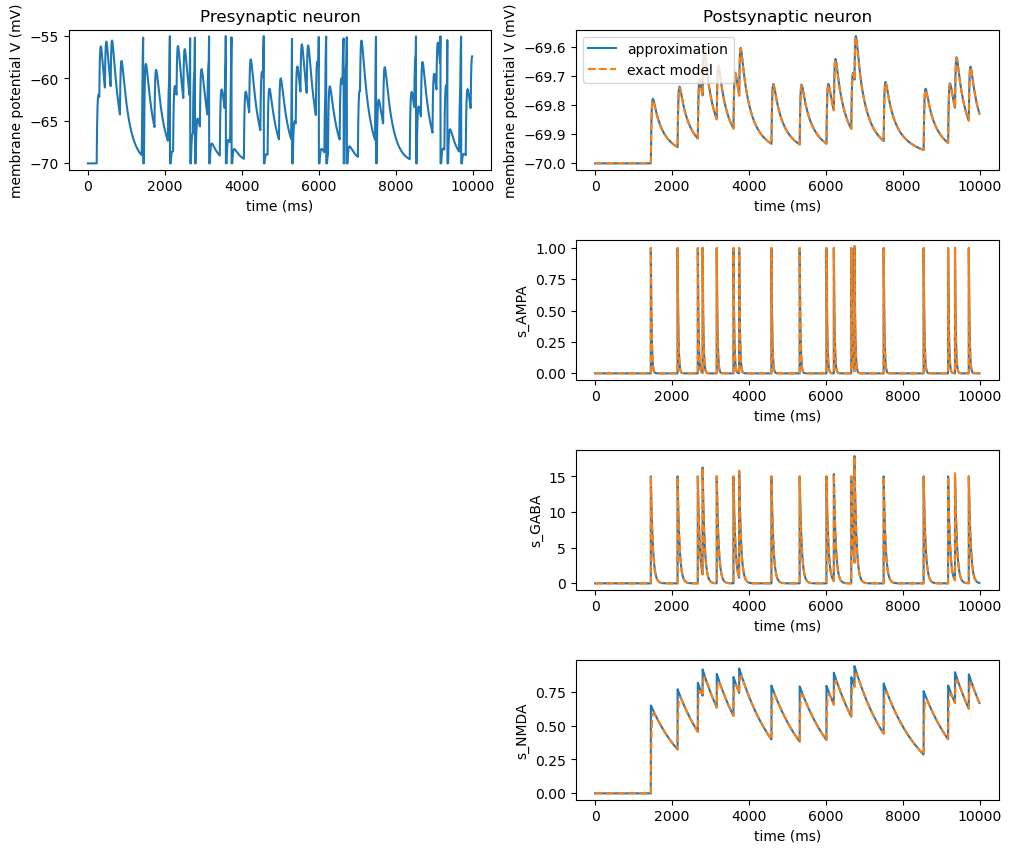

In [5]:
# get spike times from membrane potential
# cannot use spike_recorder because we abuse exact spike timing
V_m = mm1.get("events", "V_m")
times = mm1.get("events", "times")
spikes = sr.get("events", "times") * nest.resolution

def s_soln(w, t, tau):
    isyn = np.zeros_like(t)
    useinds = t >= 0.
    isyn[useinds] = w * np.exp(-t[useinds] / tau)
    return isyn

fig, ax = plt.subplots(4,2)
fig.set_size_inches([12,10])
fig.subplots_adjust(hspace=0.5)

ax[0,0].plot(mm1.events["V_m"])
ax[0,0].set_xlabel("time (ms)")
ax[0,0].set_ylabel("membrane potential V (mV)")
ax[0,0].set_title("Presynaptic neuron")

ax[0,1].plot(mm2.events["V_m"], label="approximation")
ax[0,1].plot(mm3.events["V_m"], "--", label="exact model")
ax[0,1].set_xlabel("time (ms)")
ax[0,1].set_ylabel("membrane potential V (mV)")
ax[0,1].set_title("Postsynaptic neuron")
ax[0,1].legend()



ax[1,1].plot(mm2.events["s_AMPA"])
ax[1,1].plot(mm3.events["s_AMPA"], "--")
ax[1,1].set_xlabel("time (ms)")
ax[1,1].set_ylabel("s_AMPA")


ax[2,1].plot(mm2.events["s_GABA"])
ax[2,1].plot(mm3.events["s_GABA"], "--")
ax[2,1].set_xlabel("time (ms)")
ax[2,1].set_ylabel("s_GABA")


ax[3,1].plot(mm2.events["s_NMDA"])
ax[3,1].plot(mm3.events["s_NMDA"], "--")
ax[3,1].set_xlabel("time (ms)")
ax[3,1].set_ylabel("s_NMDA")

ax[1,0].axis("off")
ax[2,0].axis("off")
ax[3,0].axis("off")

plt.show();